In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.integrate as sc_i

In [14]:
N = 1000 # resolution

# Set system properties.
t = np.linspace(0,10**-6,N) # time (s)

m = 10.*1.66054e-27 # mass (kg)
q = 5.0*1.602e-19 # charge (C)

Ex,Ey,Ez = 0.,0.,1.0e12 # electric field (N/C)
E = np.array((Ex,Ey,Ez))
Bx,By,Bz = 0.,0.,1.0 # magnetic field (T)
B = np.array((Bx,By,Bz))

# Create initial array.
x_0,y_0,z_0 = 0.,0.,0. # position (m)
vx_0,vy_0,vz_0 = 1e7,0.,0. # velocity (m/s)
ini_arr = [x_0,y_0,z_0,vx_0,vy_0,vz_0]

# Create differential function.
def g(ini_arr,t):
    '''
    Accepts a list of position (m) and velocity (m.s^-1) components in the form (x,y,z,vx,vy,vz) and a time
    t (s). Calculates acceleration (m.s^-2) components by the Lorentz force.  Returns an updated list of
    velocities and accelrations in the form (vx,vy,vz,ax,ay,az).
    '''   
    v = (ini_arr[3],ini_arr[4],ini_arr[5])
    
    # Calculate acceleration.
    a = (q/m)*E+np.cross(v,B)
    
    return [v[0],v[1],v[2],a[0],a[1],a[2]]

In [15]:
# Create dataset.
A = sc_i.odeint(g,ini_arr,t)
X = A[:,0]
Y = A[:,1]
Z = A[:,2]

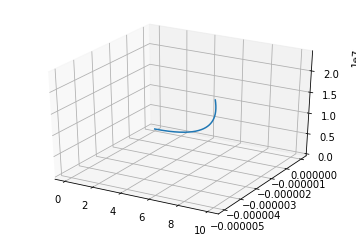

In [16]:
# Plot.
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot(X,Y,Z)

plt.show()